In [130]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from scipy.ndimage import measurements

In [455]:
def rand_lattice(L: int=20, p: float=0.5):
    """
    It creates a random lattice (matrix of booleans) with size L by L.
    The elements are True with probability (p) and False with probability (q=1-p).
    """


    return np.random.rand(L,L) <= p


def is_percolating(L_by_L):
    """
    checks the percolation of a lattice
    """


    labeled_lattice, num_clusters = measurements.label(L_by_L)
    if np.size(np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])) == 0:
        return 0
    else:
        return 1


def rgyration(L_by_L):
    """
    Returns an array containing the radii of gyration of all clusters in a lattice.

    float for the radii of gyration of non-spanning clusters.
    NaN for the radii of gyration of spanning clusters.
    """


    L = L_by_L.shape[0]
    labeled_lattice, num_clusters = measurements.label(L_by_L)
    # The next 3 lines are standard syntax for measurements.center_of_mass():
    label_list = np.arange(1, num_clusters+1)
    cm = measurements.center_of_mass(L_by_L, labels=labeled_lattice, index=label_list)
    area = measurements.sum(L_by_L, labeled_lattice, label_list)
    # The distance of every non-zero element in labeled_lattice to the center of mass
    # of its cluster is calculated and then raised to the power of 2, then summed
    # and finally put in the sum_distance2 array.
    # Note that at this step, spanning clusters are also taken into account; they will be
    # eliminated from calculations later in the function.
    sum_distance2 = np.zeros(num_clusters)

    for i in range(L):
        for j in range(L):
            # Which cluster does this element belong to? -1 for iteration purposes.
            cluster_id = labeled_lattice[i,j] - 1
            # Radius of gyration is only defined for clusters that are turned on, so (cluster_id>0),
            # but (cluster_id>=0) is written instead, again, for iteration purposes.
            if (cluster_id>=0):
                # distance to the power of 2:
                distance2 = math.dist(np.array([i,j]), cm[cluster_id]) ** 2
                sum_distance2[cluster_id] = sum_distance2[cluster_id] + distance2


    radii_of_gyration = np.sqrt(sum_distance2 / area)
    # The radii of gyration of non-spanning clusters should not be caculated,
    # so in the end, if a particular cluster_id is spanning, check and put None in its place.
    # If this last for-loop is deleted, the spanning clusters are also accounted for.
    for i in np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0]):
        radii_of_gyration[i-1] = None
    return radii_of_gyration

$\Large L \ = \ 10$

In [505]:
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Xis = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=10, p=probabilities[j])
        # average radius of gyration for the given probability p
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\1243413277.py:9: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [515]:
Xis10 = np.mean(np.nan_to_num(Xis), axis=0)

$\Large L \ = \ 20$

In [536]:
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Xis = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=20, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\2651169657.py:9: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [537]:
Xis20 = np.mean(np.nan_to_num(Xis), axis=0)

$\Large L \ = \ 40$

In [538]:
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Xis = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=40, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\3720224113.py:9: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [539]:
Xis40 = np.mean(np.nan_to_num(Xis), axis=0)

$\Large L \ = \ 80$

In [540]:
# Takes 16 seconds.
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Xis = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=80, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\203602691.py:9: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [541]:
Xis80 = np.mean(np.nan_to_num(Xis), axis=0)

$\Large L \ = \ 100$

In [516]:
# Takes 25 seconds.
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Xis = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=100, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\1190470221.py:9: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [517]:
Xis100 = np.mean(np.nan_to_num(Xis), axis=0)

$\Large L \ = \ 160$

In [542]:
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Xis = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=160, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\203389928.py:9: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [543]:
Xis160 = np.mean(np.nan_to_num(Xis), axis=0)

$\Large L \ = \ 200$

In [518]:
# Takes 100 seconds.
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Xis = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=200, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\2048430683.py:9: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [519]:
Xis200 = np.mean(np.nan_to_num(Xis), axis=0)

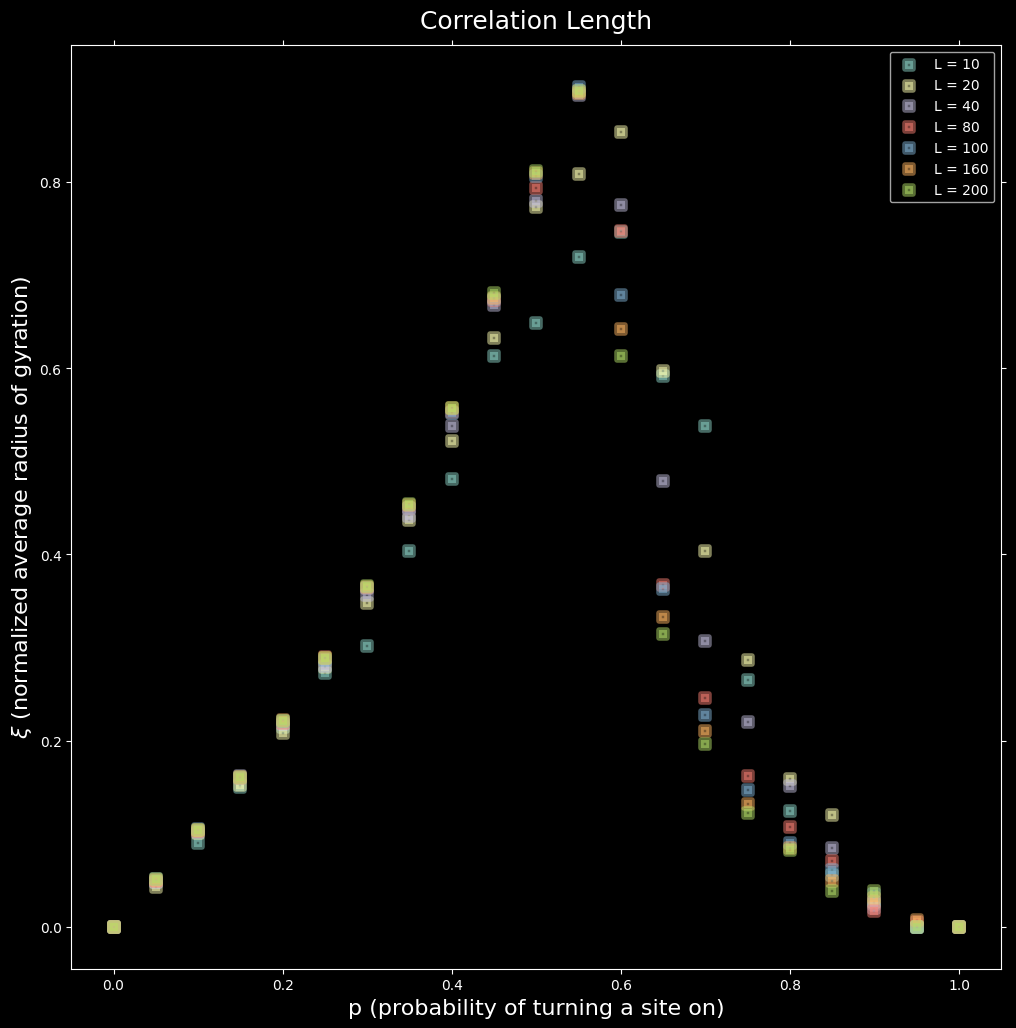

In [564]:
fig, ax = plt.subplots(figsize=(12,12))
ax.clear()
ax.scatter(probabilities, Xis10, label="L = 10", marker="s", linewidth=4, alpha=0.5)
ax.scatter(probabilities, Xis20, label="L = 20", marker="s", linewidth=4, alpha=0.5)
ax.scatter(probabilities, Xis40, label="L = 40", marker="s", linewidth=4, alpha=0.5)
ax.scatter(probabilities, Xis80, label="L = 80", marker="s", linewidth=4, alpha=0.5)
ax.scatter(probabilities, Xis100, label="L = 100", marker="s", linewidth=4, alpha=0.5)
ax.scatter(probabilities, Xis160, label="L = 160", marker="s", linewidth=4, alpha=0.5)
ax.scatter(probabilities, Xis200, label="L = 200", marker="s", linewidth=4, alpha=0.5)
ax.set_title("Correlation Length", fontsize=18, pad=12)
ax.set_xlabel("p (probability of turning a site on)", fontsize=16)
ax.set_ylabel("$\\xi$ (normalized average radius of gyration)", fontsize=16)
ax.legend();

In [565]:
# fig.savefig("Plot4_5_1.jpg")

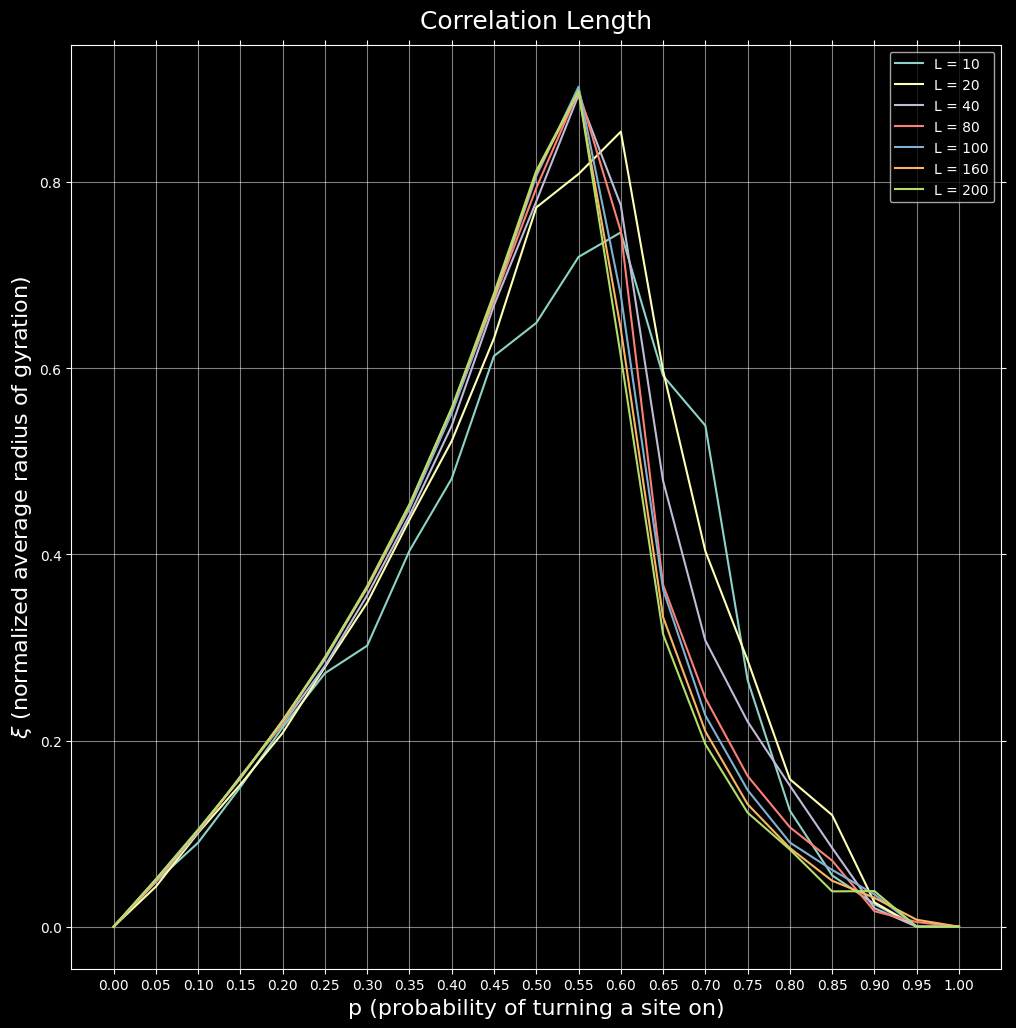

In [793]:
fig, ax = plt.subplots(figsize=(12,12))
ax.clear()
ax.plot(probabilities, Xis10, label="L = 10")
ax.plot(probabilities, Xis20, label="L = 20")
ax.plot(probabilities, Xis40, label="L = 40")
ax.plot(probabilities, Xis80, label="L = 80")
ax.plot(probabilities, Xis100, label="L = 100")
ax.plot(probabilities, Xis160, label="L = 160")
ax.plot(probabilities, Xis200, label="L = 200")
ax.set_title("Correlation Length", fontsize=18, pad=12)
ax.set_xlabel("p (probability of turning a site on)", fontsize=16)
ax.set_ylabel("$\\xi$ (normalized average radius of gyration)", fontsize=16)
ax.set_xticks(probabilities)
ax.grid(alpha=0.5)
ax.legend();

In [805]:
# At what probability p is Xi maximized for different Ls?
list_argmax_xis = [np.argmax(Xis10),
                np.argmax(Xis20),
                np.argmax(Xis40),
                np.argmax(Xis80),
                np.argmax(Xis100),
                np.argmax(Xis160),
                np.argmax(Xis200)]
print(list_argmax_xis)

[12, 12, 11, 11, 11, 11, 11]


In [790]:
print(probabilities[11])

0.55

In [794]:
# fig.savefig("Plot4_5_2.jpg")

$\Large More \ Verbose \ Around \ the \ Critical \ Probability$

$\Large L=10 \ Verbose \ Around \ p_c$

In [719]:
# Takes 16 seconds.
probabilities = np.arange(0.55, 0.65, step=0.001)
# We are going to average over 500 samples for each probability.
Xis = np.zeros((500, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(500):
        # Create a lattice:
        lattice = rand_lattice(L=10, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

C:\Users\user\AppData\Local\Temp\ipykernel_7672\2204711906.py:10: RuntimeWarning: Mean of empty slice
  Xis[i,j] = np.nanmean(rgyration(lattice))


In [720]:
Xis10_v = np.mean(np.nan_to_num(Xis), axis=0)

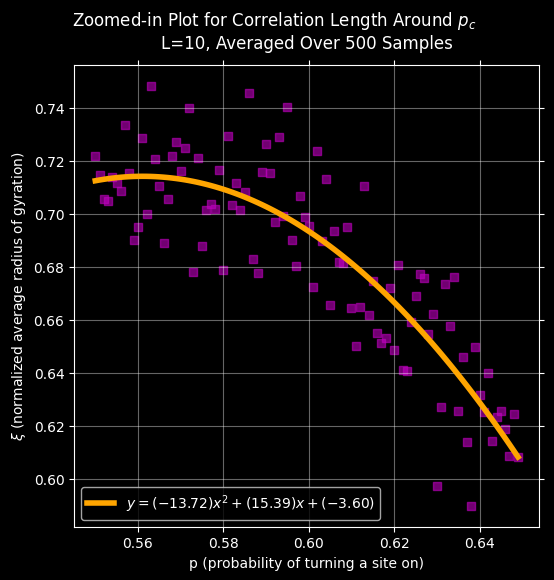

In [722]:
fig, ax = plt.subplots(figsize=(6,6))
ax.clear()
ax.scatter(probabilities, Xis10_v, marker="s", color="m", alpha=0.6)
coefs1 = np.polynomial.polynomial.polyfit(probabilities, Xis10_v, deg=2)
ffit1 = np.polynomial.polynomial.polyval(probabilities, coefs1)
ax.plot(probabilities, ffit1, color="orange", linewidth=4, label=f"$y = ({coefs1[2]:.2f})x^2 + ({coefs1[1]:.2f})x + ({coefs1[0]:.2f})$")
ax.set_title("Zoomed-in Plot for Correlation Length Around $p_c$\
             \nL=10, Averaged Over 500 Samples", pad=12)
ax.set_xlabel("p (probability of turning a site on)")
ax.set_ylabel("$\\xi$ (normalized average radius of gyration)")
ax.grid(visible=True, alpha=0.4)
ax.legend();

In [723]:
# fig.savefig("Plot4_5_3.jpg")

$\Large L=20 \ Verbose \ Around \ p_c$

In [681]:
# Takes 42 seconds.
probabilities = np.arange(0.52, 0.58, step=0.0005)
# We are going to average over 500 samples for each probability.
Xis = np.zeros((500, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(500):
        # Create a lattice:
        lattice = rand_lattice(L=20, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

In [682]:
Xis20_v = np.mean(np.nan_to_num(Xis), axis=0)

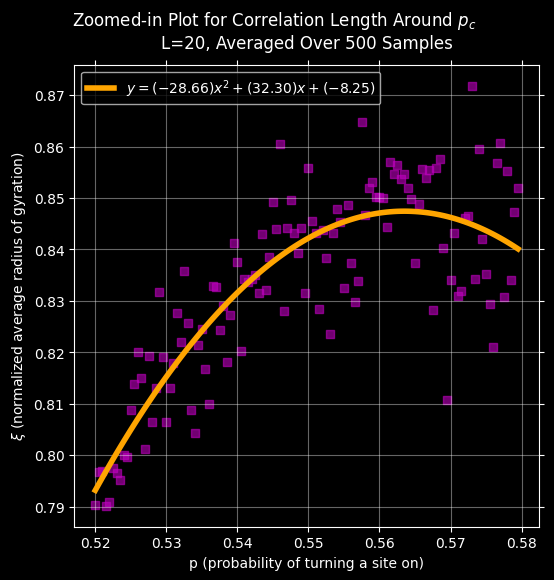

In [716]:
fig, ax = plt.subplots(figsize=(6,6))
ax.clear()
ax.scatter(probabilities, Xis20_v, marker="s", color="m", alpha=0.6)
coefs1 = np.polynomial.polynomial.polyfit(probabilities, Xis20_v, deg=2)
ffit1 = np.polynomial.polynomial.polyval(probabilities, coefs1)
ax.plot(probabilities, ffit1, color="orange", linewidth=4, label=f"$y = ({coefs1[2]:.2f})x^2 + ({coefs1[1]:.2f})x + ({coefs1[0]:.2f})$")
ax.set_title("Zoomed-in Plot for Correlation Length Around $p_c$\
             \nL=20, Averaged Over 500 Samples", pad=12)
ax.set_xlabel("p (probability of turning a site on)")
ax.set_ylabel("$\\xi$ (normalized average radius of gyration)")
ax.grid(visible=True, alpha=0.4)
ax.legend();

In [717]:
# fig.savefig("Plot4_5_4.jpg")

$\Large L=100 \ Verbose \ Around \ p_c$

In [755]:
# Takes 1 minute 10 seconds.
probabilities = np.arange(0.55, 0.56, step=0.001)
# We are going to average over 500 samples for each probability.
Xis = np.zeros((500, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(500):
        # Create a lattice:
        lattice = rand_lattice(L=100, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

In [756]:
Xis100_v = np.mean(np.nan_to_num(Xis), axis=0)

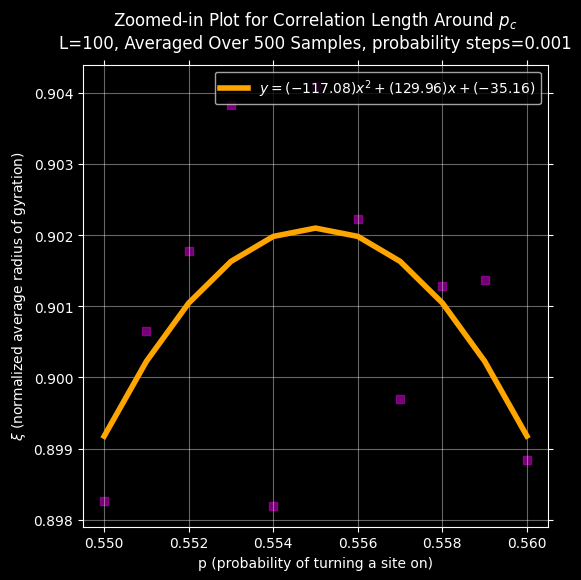

In [771]:
probabilities = np.arange(0.55, 0.56, step=0.001)
fig, ax = plt.subplots(figsize=(6,6))
ax.clear()
ax.scatter(probabilities, Xis100_v, marker="s", color="m", alpha=0.6)
coefs1 = np.polynomial.polynomial.polyfit(probabilities, Xis100_v, deg=2)
ffit1 = np.polynomial.polynomial.polyval(probabilities, coefs1)
ax.plot(probabilities, ffit1, color="orange", linewidth=4, label=f"$y = ({coefs1[2]:.2f})x^2 + ({coefs1[1]:.2f})x + ({coefs1[0]:.2f})$")
ax.set_title("Zoomed-in Plot for Correlation Length Around $p_c$\n\
L=100, Averaged Over 500 Samples, probability steps=0.001", pad=12)
ax.set_xlabel("p (probability of turning a site on)")
ax.set_ylabel("$\\xi$ (normalized average radius of gyration)")
ax.grid(visible=True, alpha=0.4)
ax.legend();

In [772]:
# fig.savefig("Plot4_5_5.jpg")

In [767]:
# Takes 2 minutes 10 seconds.
probabilities = np.arange(0.55, 0.56, step=0.0005)
# We are going to average over 500 samples for each probability.
Xis = np.zeros((500, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(500):
        # Create a lattice:
        lattice = rand_lattice(L=100, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

In [768]:
Xis100_vvv = np.mean(np.nan_to_num(Xis), axis=0)

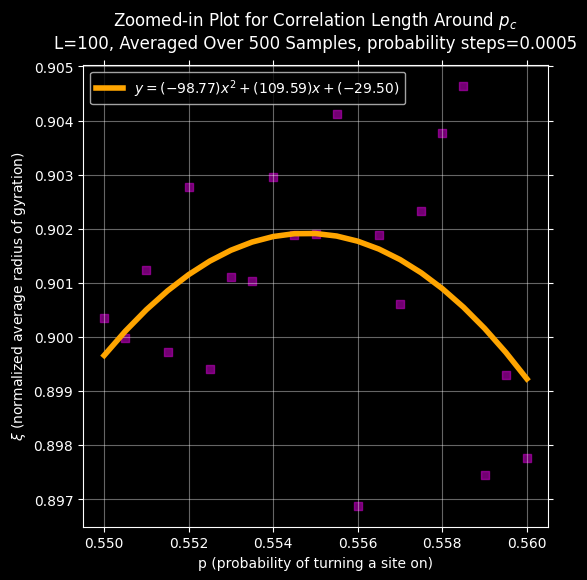

In [773]:
probabilities = np.arange(0.55, 0.56, step=0.0005)
fig, ax = plt.subplots(figsize=(6,6))
ax.clear()
ax.scatter(probabilities, Xis100_vvv, marker="s", color="m", alpha=0.6)
coefs1 = np.polynomial.polynomial.polyfit(probabilities, Xis100_vvv, deg=2)
ffit1 = np.polynomial.polynomial.polyval(probabilities, coefs1)
ax.plot(probabilities, ffit1, color="orange", linewidth=4, label=f"$y = ({coefs1[2]:.2f})x^2 + ({coefs1[1]:.2f})x + ({coefs1[0]:.2f})$")
ax.set_title("Zoomed-in Plot for Correlation Length Around $p_c$\
\nL=100, Averaged Over 500 Samples, probability steps=0.0005", pad=12)
ax.set_xlabel("p (probability of turning a site on)")
ax.set_ylabel("$\\xi$ (normalized average radius of gyration)")
ax.grid(visible=True, alpha=0.4)
ax.legend();

In [774]:
# fig.savefig("Plot4_5_6.jpg")

$\Large L=100 \ Extremely \ Verbose$

In [776]:
# Takes 11 minutes 10 seconds.
probabilities = np.arange(0.55, 0.56, step=0.0001)
# We are going to average over 500 samples for each probability.
Xis = np.zeros((500, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(500):
        # Create a lattice:
        lattice = rand_lattice(L=100, p=probabilities[j])
        Xis[i,j] = np.nanmean(rgyration(lattice))

In [777]:
Xis100_ev = np.mean(np.nan_to_num(Xis), axis=0)

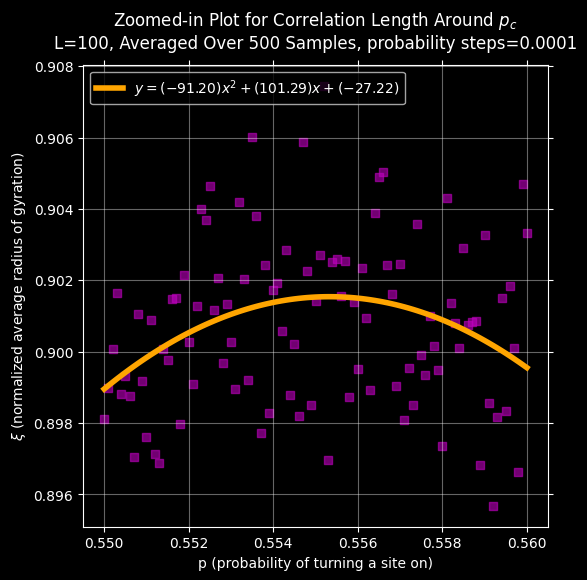

In [800]:
probabilities = np.arange(0.55, 0.56, step=0.0001)
fig, ax = plt.subplots(figsize=(6,6))
ax.clear()
ax.scatter(probabilities, Xis100_ev, marker="s", color="m", alpha=0.6)
coefs1 = np.polynomial.polynomial.polyfit(probabilities, Xis100_ev, deg=2)
ffit1 = np.polynomial.polynomial.polyval(probabilities, coefs1)
ax.plot(probabilities, ffit1, color="orange", linewidth=4, label=f"$y = ({coefs1[2]:.2f})x^2 + ({coefs1[1]:.2f})x + ({coefs1[0]:.2f})$")
ax.set_title("Zoomed-in Plot for Correlation Length Around $p_c$\
\nL=100, Averaged Over 500 Samples, probability steps=0.0001", pad=12)
ax.set_xlabel("p (probability of turning a site on)")
ax.set_ylabel("$\\xi$ (normalized average radius of gyration)")
ax.grid(visible=True, alpha=0.4)
ax.legend(loc="upper left");

In [801]:
# fig.savefig("Plot4_5_7.jpg")

In [806]:
"""
This information will be used directly in exercise 4.6.
"""
# List of max Xis for different Ls:
list_max_xis = [np.max(Xis10),
                np.max(Xis20),
                np.max(Xis40),
                np.max(Xis80),
                np.max(Xis100),
                np.max(Xis160),
                np.max(Xis200)]
list_max_xis

[0.7458632953434061,
 0.8540407151142866,
 0.8934180946187021,
 0.8982518007980691,
 0.9023237013305936,
 0.8960595268602168,
 0.8978919077096958]

In [810]:
"""
This information will be used directly in exercise 4.6.
"""
probabilities10_v = np.arange(0.55, 0.65, step=0.001)
probabilities20_v = np.arange(0.52, 0.58, step=0.0005)
probabilities100_ev = np.arange(0.55, 0.56, step=0.0001)
[probabilities10_v[np.argmax(Xis10_v)], probabilities20_v[np.argmax(Xis20_v)], probabilities100_ev[np.argmax(Xis100_ev)]]

[0.5630000000000001, 0.5729999999999942, 0.5551999999999995]